# Mini-project 6.3

##Initial data exploration and assessment

In [1]:
# First and foremost, let's import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Then, we import our data
url = 'https://github.com/FourthRevGitHub/CAM_DS_Public-Data-Sets/raw/main/Course%201/Week%206/CUSTOMERS_CLEAN.zip'
df = pd.read_csv(url)
print("Number of records:", df.shape[0])
df.head()

Number of records: 951669


,Quantity,City,Continent,Postal_Code,State_Province,Order_Date,Delivery_Date,Total Revenue,Unit Cost,Discount,OrderTypeLabel,CustomerCountryLabel,Customer_BirthDate,Customer_Group,Customer_Type,Order ID,Profit,Days to Delivery,Loyalty Num,Customer ID
0,3,Leinster,Oceania,6437,Western Australia,01JAN2012,07JAN2012,$28.50,$9.10,.,Internet Sale,Australia,08MAY1978,Internet/Catalog Customers,Internet/Catalog Customers,1230000033,$1.20,6,99,8818
1,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$113.40,$56.90,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,($0.40),3,99,47793
2,2,Berowra,Oceania,2081,New South Wales,01JAN2012,04JAN2012,$41.00,$18.50,.,Internet Sale,Australia,13DEC1978,Orion Club Gold members,Orion Club Gold members high activity,1230000204,$4.00,3,99,47793
3,1,Northbridge,Oceania,2063,New South Wales,01JAN2012,03JAN2012,$35.20,$29.60,.,Internet Sale,Australia,22JUN1997,Orion Club Gold members,Orion Club Gold members high activity,1230000268,$5.60,2,0,71727
4,1,Montréal,North America,NaN,Quebec,01JAN2012,04JAN2012,$24.70,$23.60,.,Internet Sale,Canada,28JAN1978,Orion Club Gold members,Orion Club Gold members medium activity,1230000487,$1.10,3,99,74503


In [3]:
# Check for null and duplicate values
print(df.isnull().sum())
print(f"\nDuplicates: {df.duplicated().sum()}")

Quantity                     0
City                       135
Continent                    0
Postal_Code               3716
State_Province          117192
Order_Date                   0
Delivery_Date                0
Total Revenue                0
Unit Cost                    0
Discount                     0
OrderTypeLabel               0
CustomerCountryLabel         0
Customer_BirthDate           0
Customer_Group               0
Customer_Type                0
Order ID                     0
Profit                       0
Days to Delivery             0
Loyalty Num                  0
Customer ID                  0
dtype: int64

Duplicates: 21


In [4]:
# Descriptive statistics for the datasets
df.describe(percentiles=[.25, .5, .75, .95]).T

,count,mean,std,min,25%,50%,75%,95%,max
Quantity,951669.0,1.678438e+00,8.999142e-01,1.000000e+00,1.000000e+00,1.000000e+00,2.000000e+00,3.000000e+00,1.000000e+01
Order ID,951669.0,1.236943e+09,4.273202e+06,1.230000e+09,1.233081e+09,1.236755e+09,1.240689e+09,1.243715e+09,1.244338e+09
Days to Delivery,951669.0,1.056107e+00,2.065725e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.000000e+00,3.200000e+01
Loyalty Num,951669.0,6.653408e+01,4.647679e+01,0.000000e+00,0.000000e+00,9.900000e+01,9.900000e+01,9.900000e+01,9.900000e+01
Customer ID,951669.0,4.544060e+04,2.721415e+04,1.000000e+00,2.213900e+04,4.414000e+04,7.041100e+04,8.961900e+04,9.425400e+04


In [5]:
# Storing the original dataframe away
df_original = df.copy()

# Feature engineering
df['Frequency'] = df.groupby('Customer ID')['Order ID'].transform('count')
df['Recency'] = (pd.to_datetime('today') - pd.to_datetime(df['Delivery_Date'], format='%d%b%Y')).dt.days
df['CLV'] = df['Total Revenue'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')) if pd.notnull(x) else np.nan)
df['Average Unit Cost'] = df['Total Revenue'].apply(lambda x: float(str(x).replace('$', '').replace(',', '')) if pd.notnull(x) else np.nan) / df['Quantity']
df['DOB'] = pd.to_datetime(df['Customer_BirthDate'], format='%d%b%Y')
df['Age'] = (pd.to_datetime('today') - df['DOB']).dt.days // 365
columns_to_keep = ['Customer ID', 'Frequency', 'Recency', 'CLV', 'DOB', 'Age', 'Average Unit Cost']
df = df[columns_to_keep]

# Quick inspection of the new dataframe
df.head()

,Customer ID,Frequency,Recency,CLV,DOB,Age,Average Unit Cost
0,8818,31,4915,28.5,1978-05-08,47,9.5
1,47793,20,4918,113.4,1978-12-13,46,56.7
2,47793,20,4918,41.0,1978-12-13,46,20.5
3,71727,20,4919,35.2,1997-06-22,28,35.2
4,74503,6,4918,24.7,1978-01-28,47,24.7


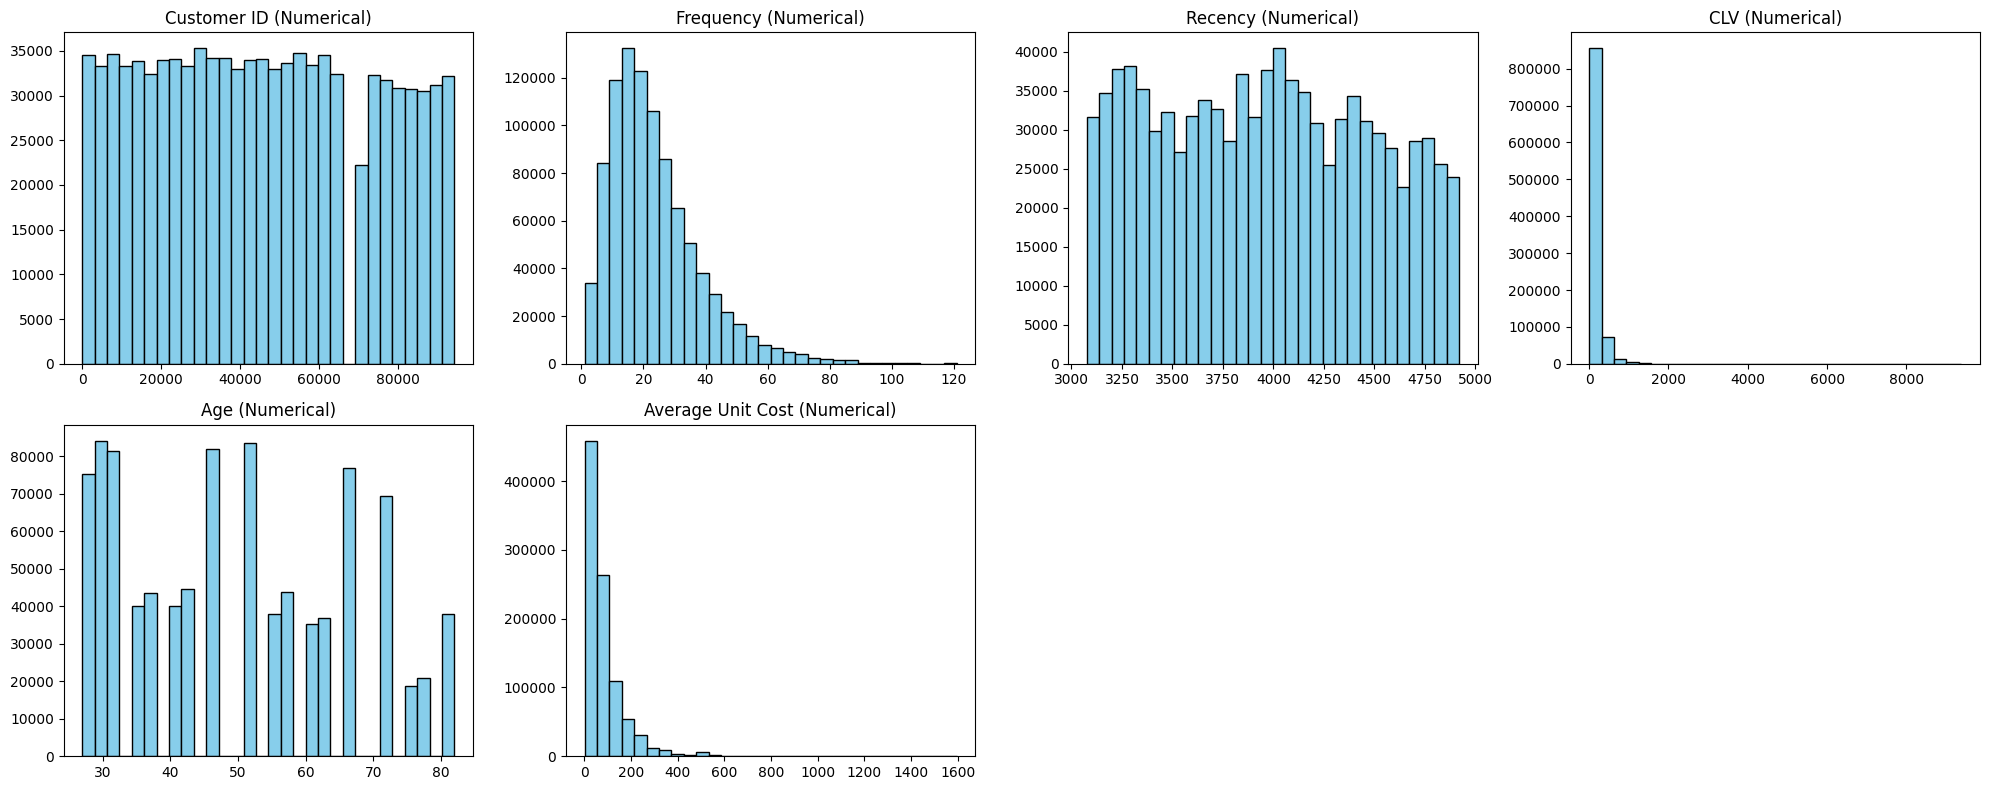

In [6]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'bool']).columns
all_cols = list(numerical_cols) + list(categorical_cols)

# Determine subplot grid size
n_cols = 4  # number of columns per row
n_rows = int(np.ceil(len(all_cols) / n_cols))

# Create figure
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# Plot each feature
for i, col in enumerate(all_cols):
    plt.subplot(n_rows, n_cols, i + 1)

    if col in numerical_cols:
        plt.hist(df[col].dropna(), bins=30, color='skyblue', edgecolor='black')
        plt.title(f'{col} (Numerical)')
    else:
        value_counts = df[col].value_counts().sort_values(ascending=False)[:10]  # top 10 categories
        plt.bar(value_counts.index.astype(str), value_counts.values, color='lightcoral', edgecolor='black')
        plt.xticks(rotation=45, ha='right')
        plt.title(f'{col} (Categorical)')

plt.tight_layout()
plt.show()

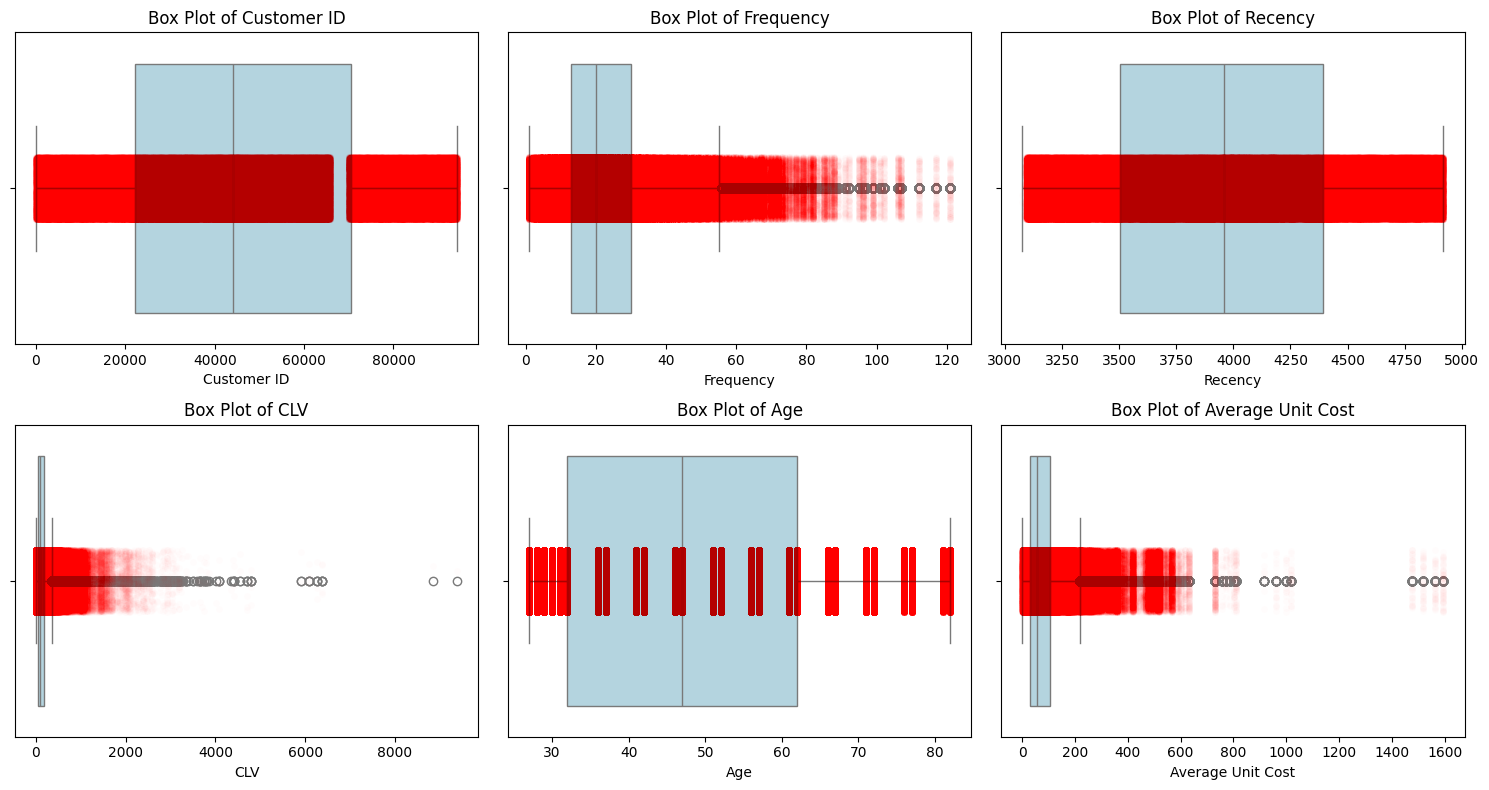

In [8]:
# Determine subplot grid size
n_cols = 3
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Set overall figure size based on the number of rows/columns
plt.figure(figsize=(5 * n_cols, 4 * n_rows))

# Loop over each numerical column
for i, col in enumerate(numerical_cols):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(x=df[col], color='lightblue')
    sns.stripplot(x=df[col], color='red', alpha=0.01)
    plt.title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()

In [ ]:
df_agg = df.groupby('Customer ID').agg({
    'Frequency': 'mean',
    'Recency': 'mean',
    'CLV': 'mean',
    'Age': 'mean',
    'Average Unit Cost': 'mean'
}).reset_index()
print("Original size: " + str(df.shape[0]) + " records, New size: " + str(df_agg.shape[0]) + " records")
df_agg.head()

Original size: 951669 records, New size: 68300 records


,Customer ID,Frequency,Recency,CLV,Age,Average Unit Cost
0,1,35.0,3862.228571,123.505714,71.0,94.928571
1,3,20.0,3898.800000,141.050000,42.0,95.815000
2,4,9.0,4416.444444,86.963333,42.0,43.032222
3,5,19.0,4122.368421,147.946316,36.0,116.278421
4,6,15.0,3783.133333,106.972000,66.0,58.652667


##Anomaly detection: IQR

In [ ]:
# Using the IQR to identify features and cataloguing them per record via binary features
for col in df_agg.columns:
  if col != 'Customer ID' and col != 'Customer ID_outlier':
    q1 = df_agg[col].quantile(0.25)
    q3 = df_agg[col].quantile(0.75)
    iqr = q3-q1
    lower_outlier_bound = q1 - 1.5*iqr
    upper_outlier_bound = q3 + 1.5*iqr

    # Create an outlier column for each existing column and fill it with values (1 if outside bounds, 0 otherwise)
    df_agg[col + '_outlier'] = ((df_agg[col] < lower_outlier_bound) | (df_agg[col] > upper_outlier_bound)).astype(int)

df_agg.head()

,Customer ID,Frequency,Recency,CLV,Age,Average Unit Cost,Frequency_outlier,Recency_outlier,CLV_outlier,Age_outlier,Average Unit Cost_outlier
0,1,35.0,3862.228571,123.505714,71.0,94.928571,0,0,0,0,0
1,3,20.0,3898.800000,141.050000,42.0,95.815000,0,0,0,0,0
2,4,9.0,4416.444444,86.963333,42.0,43.032222,0,0,0,0,0
3,5,19.0,4122.368421,147.946316,36.0,116.278421,0,0,0,0,0
4,6,15.0,3783.133333,106.972000,66.0,58.652667,0,0,0,0,0


In [ ]:
# Get list of all binary outlier columns
outlier_cols = []
for col in df_agg.columns:
  if '_outlier' in col:
    outlier_cols.append(col)

# For each record, defines a new column which sums the 0s and 1s (per row axis) from the binary outlier columns, telling us how many outliers it has
df_agg['outlier_count'] = df_agg[outlier_cols].sum(axis=1)

df_agg.head()


,Customer ID,Frequency,Recency,CLV,Age,Average Unit Cost,Frequency_outlier,Recency_outlier,CLV_outlier,Age_outlier,Average Unit Cost_outlier,outlier_count
0,1,35.0,3862.228571,123.505714,71.0,94.928571,0,0,0,0,0,0
1,3,20.0,3898.800000,141.050000,42.0,95.815000,0,0,0,0,0,0
2,4,9.0,4416.444444,86.963333,42.0,43.032222,0,0,0,0,0,0
3,5,19.0,4122.368421,147.946316,36.0,116.278421,0,0,0,0,0,0
4,6,15.0,3783.133333,106.972000,66.0,58.652667,0,0,0,0,0,0


In [ ]:
# We experiment with various thresholds (number of outlier columns we need to consider a record an outlier)
for threshold in range(1, 6):  # Try from 1 to 6 features being outliers

    # New dataframe (anomalies) which only includes records where the outlier_count >= threshold
    anomalies = df_agg[df_agg['outlier_count'] >= threshold]

    percentage = (len(anomalies) / len(df_agg)) * 100
    print(f"Threshold = {threshold}, Anomalies = {percentage:.2f}%")

Threshold = 1, Anomalies = 11.03%
Threshold = 2, Anomalies = 2.49%
Threshold = 3, Anomalies = 0.02%
Threshold = 4, Anomalies = 0.00%
Threshold = 5, Anomalies = 0.00%


We choose our threshold value such that the total percentage of records classed as outliers falls between 1-5%, as outlined in the project brief. As can be seen above, that would be a threshold value between of 2 (2.49% of the dataset being marked as outliers, respectively), meaning if a record has between two features with outlier values, we can consider the whole record to be an outlier itself.

## K-Means Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# First, we scale relevant features as K-Means Clustering is sensitive to distance
features = ['Frequency', 'Recency', 'CLV', 'Age', 'Average Unit Cost']
df_agg_x = df_agg[features]

# Then, we scale the features
scaler = StandardScaler()
df_agg_scaled = scaler.fit_transform(df_agg_x)

### Elbow Plot

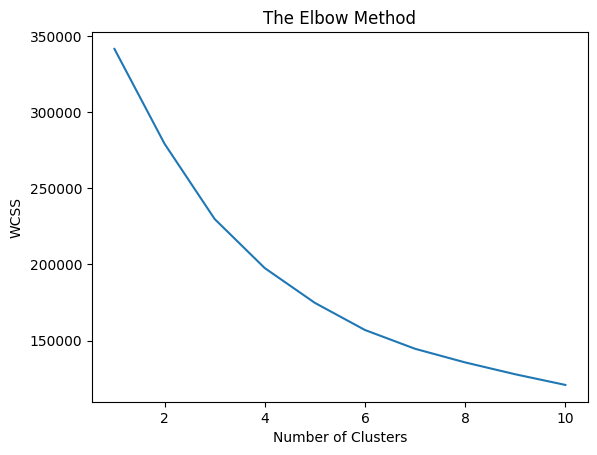

In [ ]:


# To store the WCSS (Within-Cluster Sum of Squares) for each k
wcss = []

# We loop over 1-10 values for k (number of clusters)
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0, n_init=10)
    kmeans.fit(df_agg_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Judging by the elbow plot above, the WCSS value shows a significant drop-off up to approximately k=5, after which the rate of improvement slows. Therefore, the optimal number of clusters is k=5.

### Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

# Define range of cluster values to test
range_n_clusters = range(2, 11)

# Loop through cluster counts and plot silhouette analysis
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10, n_init=10)
    cluster_labels = clusterer.fit_predict(df_agg_scaled)

    silhouette_avg = silhouette_score(df_agg_scaled, cluster_labels)
    print(f"For {n_clusters} clusters, the average silhouette score is: {silhouette_avg:.3f}")

For 2 clusters, the average silhouette score is: 0.292
For 3 clusters, the average silhouette score is: 0.212
For 4 clusters, the average silhouette score is: 0.216
For 5 clusters, the average silhouette score is: 0.209
For 6 clusters, the average silhouette score is: 0.213
For 7 clusters, the average silhouette score is: 0.195
For 8 clusters, the average silhouette score is: 0.192
For 9 clusters, the average silhouette score is: 0.191
For 10 clusters, the average silhouette score is: 0.196


For silhouette score, higher is always better. However, it is not an indicator of the optimal number of clusters. Instead, it is an indicator of how well each point fits within its cluster compared to how close it is to other clusters. Therefore, while k=2 has the best silhouette score, k=3/4/5 are also acceptable (i.e. comparable to k=2).

### Agglomerative hierarchical clustering

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist

# To save one resources, we will work on a smaller dataset
df_agg_scaled_df = pd.DataFrame(df_agg_scaled, columns=features)
df_agg_scaled_subset = df_agg_scaled_df.sample(n=30000).reset_index(drop=True)

# Hierarchical clustering from scratch
def hierarchical_clustering(df_agg_scaled_subset, method='average'):
    dists = pdist(df_agg_scaled_subset, metric='euclidean')              # Compute pairwise distances
    linkage_matrix = linkage(dists, method=method)       # Build linkage matrix using specified method
    return linkage_matrix

linkage_matrix = hierarchical_clustering(df_agg_scaled_subset, method='ward')

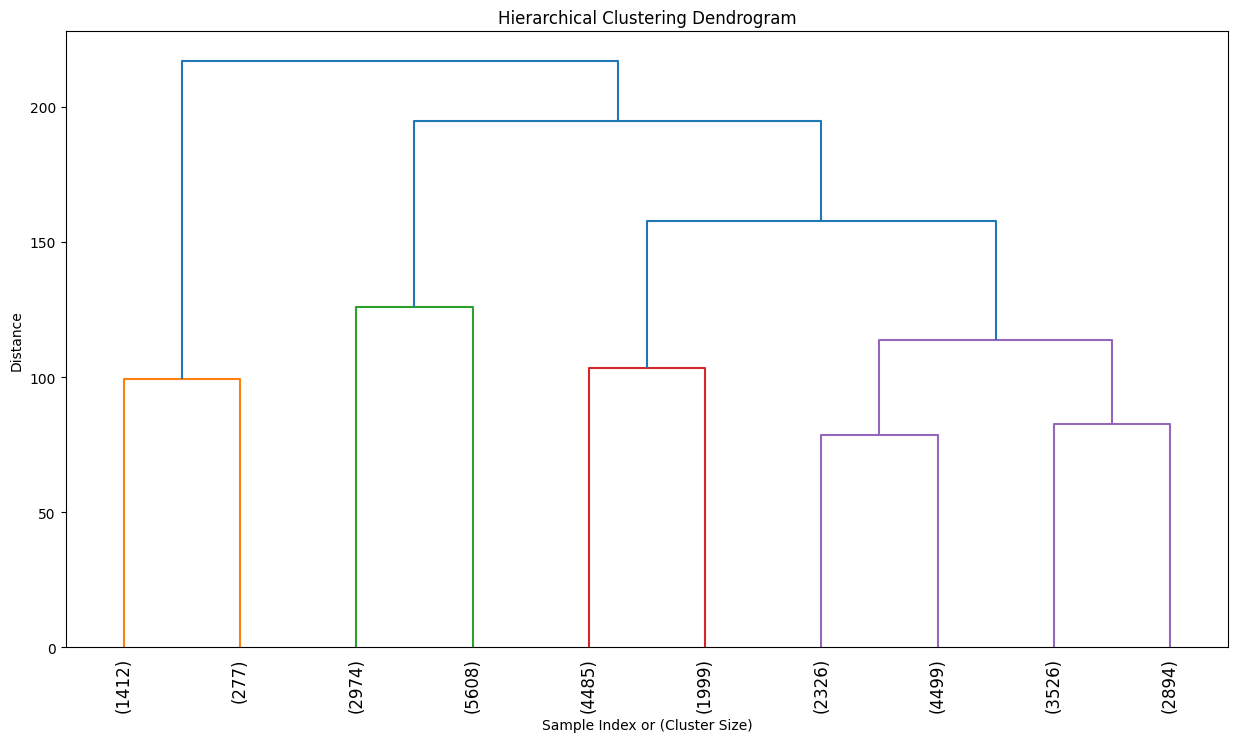

In [ ]:
k = 3  # or whatever looks reasonable based on the dendrogram
clusters = fcluster(linkage_matrix, k, criterion='maxclust')
df_agg_scaled_subset['hierarchical_cluster'] = clusters

plt.figure(figsize=(15, 8))
dendrogram(linkage_matrix, truncate_mode='lastp', p=10, leaf_rotation=90, leaf_font_size=12)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index or (Cluster Size)')
plt.ylabel('Distance')
plt.show()

The dendogram has a large jump in vertical distance from k=2 and k=3. This suggests an optimal k-value of 3. If we draw a horizontal line at this point (i.e. cutting three clusters), our separations are clear.

In [ ]:
# We choose an optimal k-value based on the elbow plot
best_k = 4
kmeans = KMeans(n_clusters=best_k, random_state=0, n_init=10)
cluster_labels = kmeans.fit_predict(df_agg_scaled)

# We assign clusters to each Customer ID
df_agg_scaled_df = df_agg_scaled_df.drop(columns=[col for col in df_agg_scaled_df.columns if '_outlier' in col])
df_agg_scaled_df['cluster'] = cluster_labels
df_agg_scaled_df.head()

,Frequency,Recency,CLV,Age,Average Unit Cost,cluster
0,1.859499,-0.350595,-0.229780,1.108007,0.273112,0
1,0.535468,-0.240862,-0.019566,-0.549996,0.295934,3
2,-0.435488,1.312331,-0.667629,-0.549996,-1.062989,3
3,0.447199,0.429955,0.063066,-0.893031,0.822777,3
4,0.094124,-0.587921,-0.427886,0.822144,-0.660832,1


## Customer Segmentation

In [ ]:
# First, we add back the Customer IDs so we can cluster them
df_agg_scaled_df['Customer ID'] = df_agg['Customer ID'].values
df_agg_scaled_df[['Customer ID', 'cluster']].head()

,Customer ID,cluster
0,1,0
1,3,3
2,4,3
3,5,3
4,6,1


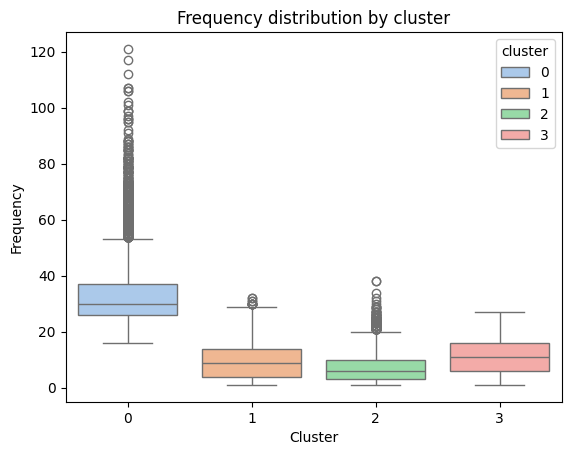

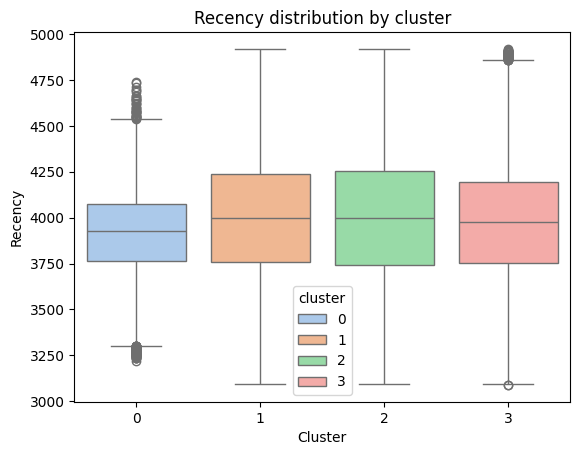

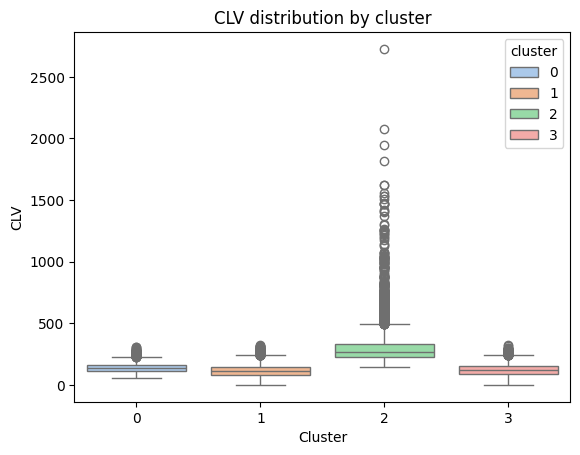

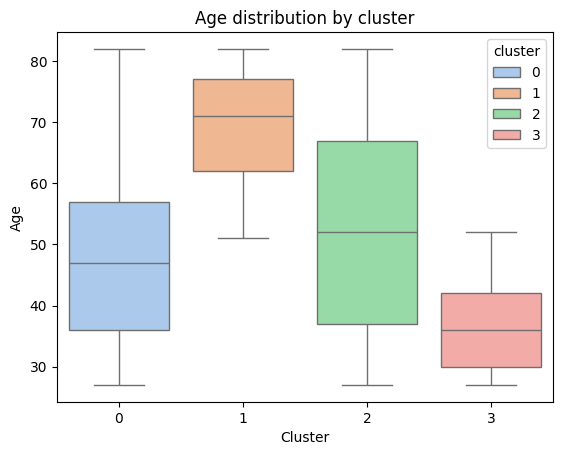

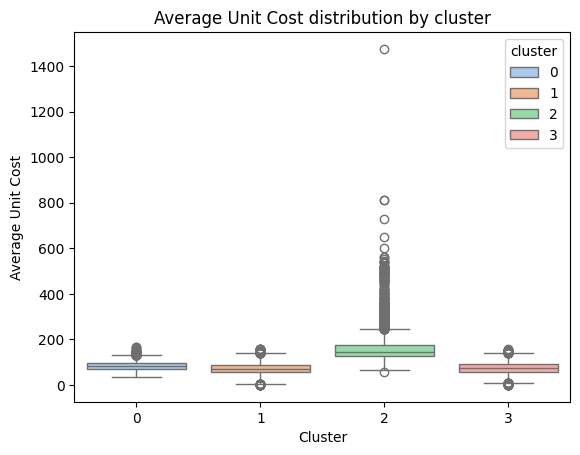

In [ ]:
# We will go on to plot unscaled data, so we copy df_agg (before scaling) and attach the cluster values
df_clustered = df_agg.copy()
df_clustered['cluster'] = df_agg_scaled_df['cluster'].values  # assuming same row order


# Plot for each feature
features = ['Frequency', 'Recency', 'CLV', 'Age', 'Average Unit Cost']
for feature in features:
    sns.boxplot(data=df_clustered, x='cluster', y=feature, palette='pastel', hue='cluster')
    plt.title(f'{feature} distribution by cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

By our box plots, we can infer the meaning of each cluster. For example:
- Cluster 0: has the highest frequency distribution ("Frequent Buyers") - ideal to retain these customers.
- Cluster 1: has the highest age distribution ("Older Buyers") - could benefit from personalised marketing to their age demographic (potentially less tech-savvy?)
- Cluster 2: has the highest average unit cost and CLV but lowest frequency distribution ("Low Freq. / High Spenders") - highly profitable and would be a great idea to increase retention and engagement from this demographic.
- Cluster 3: has the lowest age distribution ("Younger Buyers") - has potential to retain long-term clients in the future, could benefit from personalised marketing.

## Dimensionality reduction

### PCA

In [ ]:
from sklearn.decomposition import PCA

# For PCA visualisation purposes (used later)
def plot_embedding(pca, title, y_pred):
    labels = {-1: 'Anomaly', 1: 'Normal'}
    for i in np.unique(y_pred):
        plt.scatter(pca[y_pred == i, 0],
                    pca[y_pred == i, 1],
                    label=str(i))
    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.legend()
    plt.title(title)
    plt.grid(True)
    plt.show()

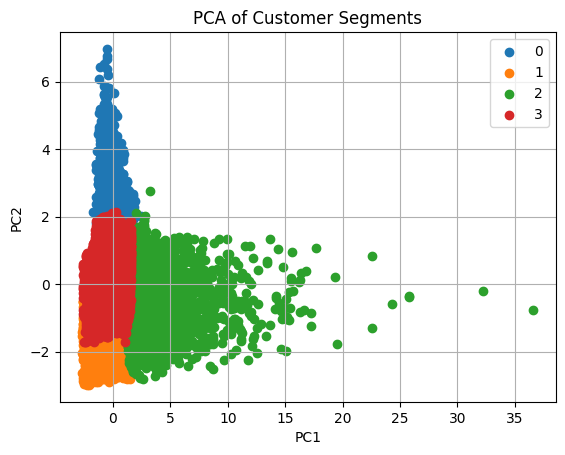

In [ ]:
# We run PCA on our scaled data
pca_model = PCA(n_components=2)
pca_result = pca_model.fit_transform(df_agg_scaled)
plot_embedding(pca_result, "PCA of Customer Segments", df_agg_scaled_df['cluster'].values)

### TSNE

In [ ]:
def plot_embedding_tsne(embedding, title, y_pred, label_map=None):
    plt.figure(figsize=(10, 6))
    unique_labels = np.unique(y_pred)
    for i in unique_labels:
        label = label_map[i] if label_map else str(i)
        plt.scatter(embedding[y_pred == i, 0],
                    embedding[y_pred == i, 1],
                    label=label,
                    alpha=0.6)

    plt.xlabel('t-SNE 1')
    plt.ylabel('t-SNE 2')
    plt.title(title)
    plt.legend(title="Customer Segment")
    plt.grid(True)
    plt.show()


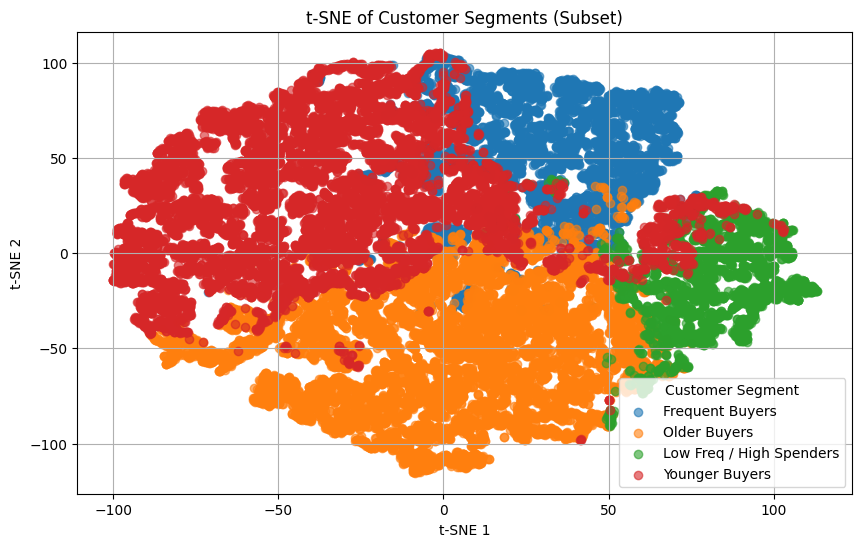

In [ ]:
from sklearn.manifold import TSNE

# Based on our box plots, we can assign meaning to cluster labels
cluster_labels = {
    0: "Frequent Buyers",
    1: "Older Buyers",
    2: "Low Freq / High Spenders",
    3: "Younger Buyers"
}

# Subset with matching cluster labels
subset = df_agg_scaled_df.sample(n=30000, random_state=42)
subset_features = subset[features].values
subset_clusters = subset['cluster'].values



# Run t-SNE on the features only
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(subset_features)

# Now cluster labels match the tsne_result exactly
#(tsne_result, "t-SNE of Customer Segments (Subset)", subset_clusters)
plot_embedding_tsne(tsne_result,
               "t-SNE of Customer Segments (Subset)",
               subset_clusters,
               label_map=cluster_labels)



# Conclusion
The t-SNE visualisation is far superior for our purposes, allowing us to more clearly see de-lineated clusters. Whilst the PCA is far faster, it is a linear method and therefore has poor visual separation. The t-SNE dimensionality reduction, whilst slow and computationally expensive, has generated distinct clusters and clear customer segments.

##Report: Communicating business impact and insights

See report document.